# Lecture 13

- Gaussian RVs continued
- Q function continued 
- Expected Value
- Moments

## Feedback Evaluation Form

[Fill this out!](https://forms.gle/ficQzQpWbfZzJVbb6)
Note: you need to be signed into Chrome or web browser through your UF account. The form, however, is anonymous.

## Guest Lecture last Thursday: Clark Wood

For more information, please email Clark Wood (clark.wood@protonmail.com)

## Last class (watch the videos from Lecture 11!)

We learned about different properties of PDFs:

1. $F_X(x) = \int_{-\infty}^x f_X(t)~dt$

2. $f_X(x) \geq 0, -\infty < x < \infty$

3. $\int_{-\infty}^{\infty} f_X(t)dt = 1$

4. $P(a < X \leq b) = \int_a^b f_X(x)~dx$ where $a\leq b$

5. If $g(x)$ is a nonnegative piecewise continuous function with finite integral $\int_{-\infty}^{\infty} g(x)~dx = c$, then $f_X(x) = \frac{g(x)}{c}$ is a valid pdf.

We also defined the CDF and survival function for the Normal RV $X$ (Gaussian with $\mu=0$ and $\sigma^2=1$), that is, $X\sim G(0,1)$:

* **CDF of $G(0,1)$:**
\begin{align*}
\Phi(x) = P(X\leq x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi}}\exp{\left\{-\frac{t^2}{2}\right\}} dt
\end{align*}

* **SF of $G(0,1)$:**
\begin{align*}
Q(x) = P(X>x) = \int_x^{\infty} \frac{1}{\sqrt{2\pi}}\exp{\left\{-\frac{t^2}{2}\right\}} dt
\end{align*}

We saw that:

\begin{align*}
\Phi(x) + Q(x) = 1, \forall x
\end{align*}

The CDF and survival function for any RV $Y\sim G(\mu,\sigma^2)$ are:

\begin{align*}
F_X(x) = \Phi \left(\frac{x-\mu}{\sigma} \right)
\end{align*}

and

\begin{align*}
S_X(x) = \operatorname{Q} \left(\frac{x-\mu}{\sigma} \right)
\end{align*}

<div class="alert alert-danger">
    Note that the denominator above is $\sigma$, not $\sigma^2$. Many students use the wrong value when solving problems!
</div>

* To find the probability of some interval using the $Q$-function, it is easiest to rewrite the probability:

\begin{align*}
P(a < X \leq b) &= P(X > a) - P(X > b) \\
&= Q\left(\frac{a-\mu}{\sigma}\right) - Q\left(\frac{b-\mu}{\sigma}\right)
\end{align*}

* In general, Gaussian probabilities can always be expressed in terms of "tail" probabilities

### More on Computing Gaussian Tail Probabilities

Any Gaussian probabilities can be decomposed in terms of Gaussian tail probabilities. There are 2 cases of the tail probabilities:

* **Case 1:** $P(X \geq a)$, where $a>\mu$

\begin{align*}
P(X \geq a) = Q\left(\frac{a-\mu}{\sigma}\right)
\end{align*}

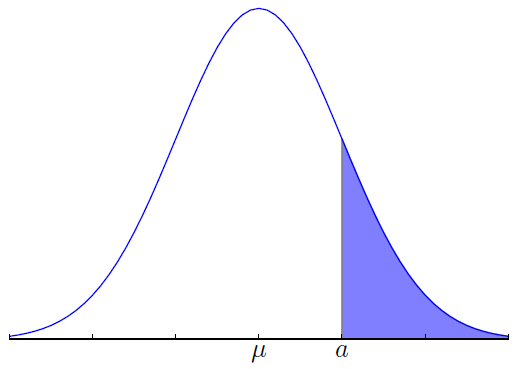

In [1]:
from IPython.display import Image
Image('figures/probXlargerA.png', width=400)

* **Case 2:** $P(X \leq b)$, where $b<\mu$

By symmetry:

\begin{align*}
P(X \geq \mu + (\mu - b)) = P(X \geq 2\mu - b) = Q\left(\frac{2\mu - b - \mu}{\sigma}\right) = Q\left(\frac{\mu-b}{\sigma}\right)
\end{align*}

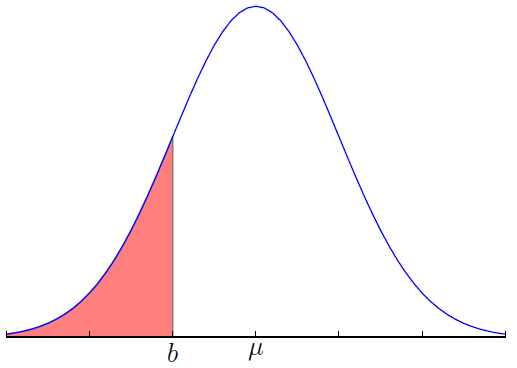

In [2]:
Image('figures/probXsmallerB.png', width=400)

___

In [6]:
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('bmh')

# Example: Grading on a curve

A professor's classroom requests that she "grades on a curve". The professor sees that the class grades can be modeled using a Gaussian distribution with parameters $\mu$ and $\sigma^2$.

Let $X$ represent a randomly chosen student's grade.

**(a) What is the probability that the student's grade is above $\mu$?**

$P(X > \mu) = Q\left(\frac{\mu - \mu}{\sigma}\right) = Q\left(\frac{0}{\sigma}\right) = \frac{1}{2}$

**(b) The professor decides to use the following grading strategy:**

* If the grades are more than $\sigma$ above the mean, assign an A

* If the grades are within $\sigma$ of the mean ($\mu$), assign a B

* If the grades are more than $\sigma$ below the mean, but less than $2\sigma$ below the mean, assign C

* If the grades are more than $2\sigma$ below the mean, but less than $3\sigma$ below the mean, assign D

* If the grades are more than $3\sigma$ below the mean, assign E

Determine the probability that a randomly chosen student gets each grade.

\begin{align*}
P(A) &= P(X \geq \mu + \sigma) = Q\left(\frac{\mu + \sigma - \mu}{\sigma}\right) = Q(1)\\
P(B) &= P(\mu -\sigma < X < \mu + \sigma) = 1 - 2P(X > \mu + \sigma) = 1 - 2 Q\left(\frac{\mu+\sigma-\mu}{\sigma}\right) = 1 - 
2 Q(1)\\
P(C) &= P(\mu - 2\sigma < X < \mu - \sigma) = P(X \geq \mu - 2\sigma) - P(X \geq \mu - \sigma) = Q(1) - Q(2)\\
P(D) &= P(\mu - 3\sigma < X < \mu - 2\sigma) = P(X \geq \mu - 3\sigma) - P(X \geq \mu - 2\sigma) = Q(2) - Q(3)\\
P(E) &= P(X < \mu - 3\sigma) = P(X > \mu + 3\sigma) = Q(3)
\end{align*}

<!-- \begin{align*}
P(A) &= P(X \geq \mu + \sigma) = Q\left(\frac{\mu + \sigma - \mu}{\sigma}\right) = Q(1)\\
P(B) &= P(\mu -\sigma < X < \mu + \sigma) = 1 - 2P(X > \mu + \sigma) = 1 - 2 Q\left(\frac{\mu+\sigma-\mu}{\sigma}\right) = 1 - 
2 Q(1)\\
P(C) &= P(\mu - 2\sigma < X < \mu - \sigma) = P(X \geq \mu - 2\sigma) - P(X \geq \mu - \sigma) = Q(1) - Q(2)\\
P(D) &= P(\mu - 3\sigma < X < \mu - 2\sigma) = P(X \geq \mu - 3\sigma) - P(X \geq \mu - 2\sigma) = Q(2) - Q(3)\\
P(E) &= P(X < \mu - 3\sigma) = P(X > \mu + 3\sigma) = Q(3)
\end{align*} -->

Checking work:

**(c) Suppose the threshold to get an A is $k\sigma$ above the mean, what value of $k$ is needed for 40% of the class to get an A?**

\begin{align*}
P(X \geq \mu + k\sigma) &= 0.4 \\
Q\left(\frac{\mu + k\sigma - \mu}{\sigma}\right) &= 0.4 \\
Q(k) &= 0.4 \\
k &= Q^{-1}(0.4) \\
k &\approx 0.25 \text{ (using Q-function table)} 
\end{align*}

<!-- \begin{align*}
P(X \geq \mu + k\sigma) &= 0.4 \\
Q\left(\frac{\mu + k\sigma - \mu}{\sigma}\right) &= 0.4 \\
Q(k) &= 0.4 \\
k &= Q^{-1}(0.4) \\
k &\approx 0.25 \text{ (using Q-function table)} 
\end{align*} -->

___

# Expected Value

Consider again a set of observations $x_1, x_2, \dots, x_N$.

Then the **average** of the data is 

\begin{align*}
\overline{x} = \frac{1}{N} \sum_{i=1}^N x_i
\end{align*}

* We would like to define a similar notion for a random variable $X$, but take the average over the *ensemble* of potential values of $X$.

* This value is the *expected value*, *ensemble mean*, or simply *mean* of $X$.

* We can use *relative frequency* to connect the two.

Suppose that $X=\{x_i\}_{i=1}^n$ are random data that take values from $S_k=\{a_1,a_2,\dots,a_k\}$, where $k<\infty$.

\begin{align*}
\overline{X} = \frac{1}{N} \sum_{i=1}^N x_i
\end{align*}

Let $n_j \equiv$ \# of times $a_i$ occurs, then 

\begin{align*}
\overline{X} = \frac{1}{N} \sum_{j=1}^N a_j \cdot n_j = \sum_{j=1}^N a_j \cdot \frac{n_j}{N}
\end{align*}

If our experiment possesses statistical regularity,

\begin{align*}
\lim_{n\rightarrow\infty} \frac{n_j}{N} \rightarrow p_j = P(a_j)
\end{align*}

Therefore,

\begin{align*}
\lim_{n\rightarrow\infty} \overline{X} = \sum_{j=1}^N a_j \cdot p_j \triangleq E[X]
\end{align*}

<div class="alert alert-info">
    <b>Expected Value</b>
    
The **expected value** or **mean** of a random variable $X$ is
    
\begin{align*}
\mu_X= E[X] = \sum_x x p_X(x),
\end{align*}
    
if $X$ is a **discrete random variable**, and is defined as
    
\begin{align*}
\mu_X = E[X] = \int_{-\infty}^{\infty} xf_X(x)~dx,
\end{align*}
    
if $X$ is a **continuous random variable**.

**Note:** In some special cases, we would not define the expected value because it is of the form $-\infty$, $+\infty$. We won't cover those in this class.
</div>

## Why do we care about the mean?

In a repeated experiment, the limit of the average value is the mean
* In fact, we will show that we can determine a limit on the number of times the experiment must be repeated to ensure that the average is within a range around the mean with a specified probability (Chebyshev's inequality, covered later)
    
If we wish to use a constant value to estimate a random variable, then the mean is the value that minimizes the mean-square error.

Note that $E[X]$ may be infinite.

**<font color=blue>Example 1:</font>** Rolling a fair 6-sided die.

Let $X$ be the number of top face of die.

\begin{align*}
E[X] &= \sum_{i=1}^6 i \times P(X=i)\\
&= \sum_{i=1}^6 i \times\frac{1}{6}\\
&= \frac{21}{6}\\
&= 3.5
\end{align*}

<!-- Let $X$ be the number of top face of die.

\begin{align*}
E[X] &= \sum_{i=1}^6 i \times P(X=i)\\
&= \sum_{i=1}^6 i \times\frac{1}{6}\\
&= \frac{21}{6}\\
&= 3.5
\end{align*} -->

**<font color=blue>Example 2:</font>** Bernoulli RV.

Let $X \sim \text{Bernoulli}(p)$, then $p_X(x) = \begin{cases} p & x=1\\ 1-p & x=0 \\ 0 & \text{o.w.}  \end{cases}$

\begin{align*}
E[X] = (0)(1-p) + (1)(p) = p
\end{align*}

<!-- Let $X \sim \text{Bernoulli}(p)$, then $p_X(x) = \begin{cases} p & x=1\\ 1-p & x=0 \\ 0 & \text{o.w.}  \end{cases}$

\begin{align*}
E[X] = (0)(1-p) + (1)(p) = p
\end{align*} -->

**<font color=blue>Example 3:</font>** What is the expected value of the random variable $X\sim U(1,6)$?

Let $X\sim U(1,6)$, then $f_X(x) = \begin{cases} \frac{1}{6-1}, & x\in [1,6]\\ 0, & \text{o.w.} \end{cases}= \begin{cases} \frac{1}{5}, & x\in [1,6]\\ 0, & \text{o.w.} \end{cases}$

\begin{align*}
E[X] &= \int_{-\infty}^{\infty} xf_X(x)dx = \int_1^6 x\frac{1}{5}dx = \frac{x^2}{10}\Big|_1^6 = \frac{6^2}{10} - \frac{1^2}{10} = \frac{35}{10} = 3.5
\end{align*}

<!-- Analytically, we have:

\begin{align*}
E[X] = \int_{-\infty}^{\infty} uf_U(u)~du = \int_1^7 u\frac{1}{7-1}~du = \frac{1}{12}u^2 \Big|_1^7 = 4
\end{align*} -->

**<font color=blue>Example 4:</font>** What is the expected value of the random variable $X\sim \text{Exp}(\lambda)$?

Analytically:

\begin{align*}
E[X] = \int_0^{\infty} x \lambda e^{-\lambda x}~dx =\lambda \int_0^{\infty} x e^{-\lambda x}~dx
\end{align*}

Need to apply integral by parts.

<!-- Analytically:

\begin{align*}
E[X] = \int_0^{\infty} x \lambda \exp^{-\lambda x}~dx =\lambda \int_0^{\infty} x \exp^{-\lambda x}~dx
\end{align*}

Need to apply integral by parts. -->

___

# Important Properties of the Expected Value

## Property 1 - Linearity

Expected value is a **linear operator**. If $X$ and $Y$ are random variables, and $a$ and $b$ are arbitrary constants, then

\begin{align*}
E[aX + bY] = aE[X] + bE[Y]
\end{align*}

*Note that this does not required that $X$ and $Y$ be independent.*

___

**<font color=blue>Example 5:</font>** Expected Value of a Binomial RV.

Let $B_i$, $i=1,2,\cdots, N$ be a sequence of independent Bernoulli random variables with common parameter $p$. Then

\begin{align*}
X=\sum_{i=1}^N B_i
\end{align*}

is a $\text{Binomial}(N,p)$ random variable.

Using the linearity property,

\begin{align*}
E[X] &= E\left[ \sum_{i=1}^N B_i\right]\\
&= \sum_{i=1}^N E[B_i]\\
&= \sum_{i=1}^N p\\
&= Np
\end{align*}

We can also derive the same result from the PMF of a Binomial RV, but it is *way* more complicated:

\begin{align*}
E[X] = \sum_{n=0}^N n\binom{N}{n} p^n q^{N-n}
\end{align*}

(Left as exercise.)

___

## Property 2 - Expected Value of a Function

If $Y=g(X)$, it is not necessary to compute the PDF or CDF of $Y$ to find its expected value. We can find it using $X$:

\begin{align*}
E[Y] = \int_{-\infty}^{\infty} g(x) f_X(x)~dx
\end{align*}

This is sometimes known as the **Law of the Unconscious Statistician (LOTUS)**.

## Property 3 - Expected Value of a Scalar

The expected value of a scalar constant $c$ is $E[c] = c$.

Let $g(x) = c$, then:

\begin{align*}
E[c] &= \int_{-\infty}^{\infty} c f_X(x)~dx\\
&= c \int_{-\infty}^{\infty} f_X(x)~dx\\
&= c
\end{align*}

* Note that $E[f(X)] \neq f(E[X])$.

___

**<font color=blue>Example 6:</font>** Recall that if $x_i$ are samples drawn from a random variable $X$, then

\begin{align*}
\lim_{N\rightarrow\infty} \frac{1}{N} \sum_{i=1}^N x_i = E[X]
\end{align*}

This is the result from the **Central Limit Theorem (CLT)**.

Let's create a Uniform random variable object using ```scipy.stats```. Draw 10,000 sample values from it, and use the sample values to estimate $(E[U])^2$ and $E[U^2]$.

___

# Moments of a Random Variable

<div class="alert alert-info">
    <b>Moments</b>
    
The **moments** of a random variable (or of its distribution) are *expected values of powers* or related functions of the random variable.

The $n$-th moment of a **continuous** RV $X$ is 

\begin{align*}
E[X^n] = \int_x t^n f_X(t)~dt
\end{align*}

The $n$-th moment of a **discrete** RV $X$ is 
    
\begin{align*}
E[X^n] = \sum_x x^n p_X(x)
\end{align*}

* In particular, the first moment is the *mean*, $\mu_X = E[X]$.
</div>

<div class="alert alert-info">
    <b>Central Moments</b>
    
The **central moments** of a random variable (or of its distribution) are *expected values of mean-centered powers* or related functions of the random variable.

The $n$-th central moment of RV $X$ is $E[(X - \mu_X)^n]$, in general, $E[(X - E[X])^n]$.
    
If $X$ is a **continuous** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \int_x (t-\mu_X)^n f_X(t)~dt
\end{align*}
    
If $X$ is a **discrete** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \sum_x (x-\mu_X)^n p_X(x)
\end{align*}
</div>

* Moments of a random variable are expected values of the random variable raised to some power.

* For a *central moment*, the mean is subtracted from the random variable before it is raised to a power.

Because different powers spread the values of the random variable in different ways, **moments can provide additional information about a random variable other than the mean value**:

In mathematics, a moment is a specific quantitative measure of the shape of a function. The most important ones are: 

1. **Mean**, the 1st moment

2. **Variance**, the 2nd central moment 

3. **Skewness**, the 3rd central moment 

4. **kurtosis**, the 4th central moment

**Variance is the second central moment** and provides a measure of how much the probability density or mass of random variable is spread away from the mean. We define it as:

\begin{align*}
Var[X] &= E[(X-\mu_X)^2]\\
&= E[X^2 - 2\mu_X X + \mu_X^2] \\
&= E[X^2] - 2\mu_XE[X] + \mu_X^2 \\
&= E[X^2] - 2E[X]E[X] + (E[X])^2 \\
&= E[X^2] - (E[X])^2
\end{align*}

So,

\begin{align*}
Var[X] = E[X^2] - (E[X])^2
\end{align*}

This latter formula is usually a more convenient way to find the variance.

* The variance of a Gaussian random variable is the parameter $\sigma^2$ (you can get it through integration by parts or some clever manipulation).

___

## Properties of Variance

Let $X$ be a random variable and $b$ and $c$ constant values.

1. $Var[X] = E[X^2] - (E[X])^2 \geq 0$

2. $Var[c] = 0$

3. $Var[X - c] = E[X^2] - (E[X])^2$

4. $Var[cX] = c^2 Var[X]$

5. $Var[cX + b] = c^2 Var[X]$

___

We can compute the most common moments of a random variable using the ```stats``` module:

In [ ]:
# Moments of G(mu=0,var=1)




In [ ]:
x = np.linspace(-5,5,100)
G = stats.norm(loc=0,scale=1) # G(0,1)

plt.plot(x,G.pdf(x))
plt.plot(G.stats('m'), G.pdf(G.stats('m')), '*r', markersize=10, label='Mean')
plt.plot(G.median(), G.pdf(G.median()), '*g', markersize=10, label='Median')
plt.legend(fontsize=15)
plt.title('$X\sim G(\mu=0,\sigma^2=1)$',size=15)
plt.xlabel('x',size=15)
plt.ylabel('$f_X(x)$',size=15);

In [ ]:
# Moments of E(lambda=0.5)




In [ ]:
x = np.linspace(-1,12,100)
plt.plot(x,E.pdf(x))
plt.plot(E.stats('m'), E.pdf(E.stats('m')), '*r', markersize=10, label='Mean')
plt.plot(E.median(), E.pdf(E.median()), '*g', markersize=10, label='Median')
plt.legend(fontsize=15)
plt.title('$X\sim Exponential(\lambda=1/2)$',size=15)
plt.xlabel('x',size=15)
plt.ylabel('$f_X(x)$',size=15);

In [ ]:
# Moments of Binomial(15,0.9)




In [ ]:
x = range(19)
plt.stem(x,Bn.pmf(x),'k',label='PMF')
plt.plot(x, Bn.pmf(x))
plt.plot(Bn.stats('m'), 0.3, '*r', markersize=10, label='Mean')
plt.plot(Bn.median(), Bn.pmf(Bn.median()), '*g', markersize=10, label='Median')
plt.legend(fontsize=15)
plt.title('$X\sim Binomial(N=15,p=0.9)$',size=15)
plt.xlabel('x',size=15)
plt.ylabel('$p_X(x)$',size=15);

___

# Distribution of Binary Hypothesis

In binary hypothesis testing, we built statistics that access a specific moment of the distribution (mean-difference, median-difference, etc.). We can also consider a full distribution for our hypotheses.

That is, we will be conditioning random variables depending on which hypothesis is true: $f_X(x|H_0)$ or $f_X(x|H_1)$.

In general, there are multiple ways in which random variables can depend on events or on other random variables.

We consider the same type as above: there is dependence between a random variable and some event, such that the distribution of the random variable is known if the event is known.

### <font color=blue>Motivating Case Study: Binary Communications</font>

In a binary communication system, the received signal is a noisy version of the transmitted signal. 

In the presence of thermal noise, the
  received signal can be modeled as $X= s_i + N$, where: 
* $s_i \in \{-1, 1\}$ depends on which signal is transmitted (1 or 0), and
* $N$ is a Gaussian random variable with mean 0 and variance $\sigma^2 $, which determines the signal-to-noise ratio

Thus, the received signal has a conditional distribution, depending on which signal
  is transmitted:
\begin{align*}
  \begin{cases}
  X  \sim \mbox{Gaussian}(+1,\sigma^2), & 0 \mbox{ transmitted}\\
  X  \sim \mbox{Gaussian}(-1,\sigma^2), & 1 \mbox{ transmitted}
  \end{cases}
\end{align*}

(Here only the mean changes and not the variance, but this is an accurate
  model of what happens in most binary communication systems.)

We can write the conditional density and distribution functions given that $i$ was transmitted as $f_X(x|i\sim \mbox{Tx})$ and $F_X(x|i\sim\mbox{Tx})$.

**<font color=blue>Example 7</font>** Let $T_i$ denote the event that $i$ is transmitted. Calculate the probability that $X>2$ if $P(T_0)=0.25$, $P(T_1)=0.75$ and $\sigma^2=4$.

We can easily solve this problem using what we already know about conditional probability and Gaussian random variables:

\begin{align*}
P(X>2) &= P(X>2|T_0)P(T_0) + P(X>2|T_1)P(T_1) ~\mbox{, by Total Probability}\\
&= Q\left(\frac{2-1}{\sigma} \right)(0.25) +
Q\left(\frac{2-(-1)}{\sigma} \right)(0.75) \\
&= Q\left(\frac{1}{2} \right)(0.25) +
Q\left(\frac{3}{2} \right)(0.75) \\
&\approx 0.127
\end{align*}

<!-- We can easily solve this problem using what we already know about conditional probability and Gaussian random variables:

\begin{align*}
P(X>2) &= P(X>2|T_0)P(T_0) + P(X>2|T_1)P(T_1) ~\mbox{, by Total Probability}\\
&= Q\left(\frac{2-1}{\sigma} \right)(0.25) +
Q\left(\frac{2-(-1)}{\sigma} \right)(0.75) \\
&= Q\left(\frac{1}{2} \right)(0.25) +
Q\left(\frac{3}{2} \right)(0.75) \\
&\approx 0.127
\end{align*} -->

**<font color=blue>Example 2</font>** Calculate the probability of error if the decision rule is:

\begin{align*}
\begin{cases} \hat{T}_0, & X \ge 0\\ \hat{T}_1, & X<0, \end{cases}
\end{align*}

where $\hat{T}_i$ denotes deciding that $i$ was transmitted. Provide a numerical answer when $\sigma^2=0.1$ and $P(T_0)=P(T_1)=\frac{1}{2}$.

<!-- \begin{align*}
P(E) &= P(X\ge 0 \cap T_1) + P(X<0 \cap T_0) \\
&= P(X \ge 0 \vert T_1)P(T_1) + P(X<0 \vert T_0) P(T_0)\\
&= Q\left(\frac{0-(-1)}{\sigma}\right) P(T_1) + Q\left(\frac{1-0}{\sigma} \right) P(T_0) \\
&= Q\left(\frac{1}{\sigma}\right)\\
&\approx 0.00078
\end{align*} -->

\begin{align*}
P(E) &= P(X\ge 0 \cap T_1) + P(X<0 \cap T_0) \\
&= P(X \ge 0 \vert T_1)P(T_1) + P(X<0 \vert T_0) P(T_0)\\
&= Q\left(\frac{0-(-1)}{\sigma}\right) P(T_1) + Q\left(\frac{1-0}{\sigma} \right) P(T_0) \\
&= Q\left(\frac{1}{\sigma}\right)\\
&\approx 0.00078
\end{align*}

What if the variance of the Gaussian noise was larger?

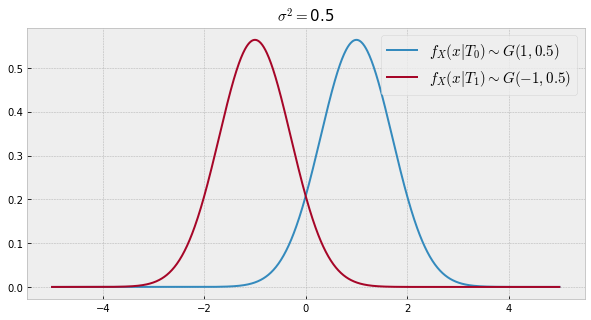

In [5]:
# Define sigma_sq


# Define normal distributions with variance sigma_sq

x = np.linspace(-5,5,1000)

plt.figure(figsize=(10,5))
plt.plot(x, G_T0.pdf(x), label='$f_X(x|T_0)\sim G(1,'+str(sigma_sq)+')$')
plt.plot(x, G_T1.pdf(x), label='$f_X(x|T_1)\sim G(-1,'+str(sigma_sq)+')$')
plt.legend(fontsize=15)
plt.title('$\sigma^2=$'+str(sigma_sq), size=15);

___

# Optimal Decisions

Now suppose that we want to make an optimal decision $\hat{T}_i$ based on observing the value of $X$ at the output of the receiver. I.e., given that we have $X=x$ for some value $x$.

The MAP rule is to choose the most probable value that was transmitted given the observation. So, that corresponds to:

* If $P(T_0 \vert X=x) \ge P(T_1 \vert X=x)$, decide 0
* If $P(T_1 \vert X=x) > P(T_0 \vert X=x)$, decide 1

and by the definition of conditional probability

\begin{align*}
P(T_0|X=x) = \frac{P(T_0 \cap X=x)}{P(X=x)}
\end{align*}

<div class="alert alert-danger">
    But both the numerator and denominator are 0, because $X$ is a continuous random variable!
</div>

# Point Conditioning

Suppose we want to evaluate the probability of an event $A$ given
that $\!X=\!x$, where $X$ is a continuous random variable.  

* Then, if we use the definition of conditional probability
\begin{align*}
P(A|X = x) &=  \frac{P(A \cap X\!=\!x)}{P(X\!=\!x)}  = \frac{0}{0}       ,
\end{align*}

This case is called ***point conditioning***, and we treat it as a special case:

\begin{align*}
P(A|X = x) &= \underset{ \Delta x \rightarrow 0}{\lim} P(A| x < X \le x+ \Delta x ) \\
&= \underset{ \Delta x \rightarrow 0}{\lim}\frac{F_X(x + \Delta x |A)- F_X(x|A)}{F_X(x+\Delta x)-F_X(x)}P(A)\\
&= \underset{ \Delta x \rightarrow 0}{\lim}\frac{\frac{ F_X(x + \Delta x |A)- F_X(x|A)}{ \Delta x}}{\frac {F_X(x+\Delta x)-F_X(x)}{ \Delta x}} P(A)\\
&= \frac{f_X(x|A)}{f_X(x)} P(A),
\end{align*}

if $f_X(x|A)$ and $f_X(x)$ exist, and $f_X(x) \ne 0$.

(The result looks like what you would do if you didn't know any better -- treat the densities as if they were probabilities, and everything works out!)




<div class="alert alert-info">
    <b>Point Conditioning Form of Conditional Probability</b>
    
\begin{align*}
P(A|X = x) = \frac{f_X(x|A)P(A)}{f_X(x)}
\end{align*}
</div>

## Implications of Point Conditioning

Note that the form above is almost a Bayes' rule form: If $A$ is some input event and $f_X(x|A)$ is the likelihood of $X$ given $A$, then $P(A|X=x)$ is the *a posteriori* probability of $A$ given that the output of the system is $X=x$.

However, we don't know how to calculate $f_X(x)$ yet.

### Total Probability for Conditional Density Functions

If  $\left\{A_i\right\}$ form a partition of $S$, then from our previous work on the Law of Total Probability, we have
\begin{align*}
F_X(x) &= P(X \le x) \\
&= \sum_i P(X \le x| A_i) P(A_i) \\
&= \sum_i F_X(x|A_i) P(A_i)
\end{align*}
    
Since $ f_X(x) = \frac{d}{dx} F_X(x)$ and $f_X(x|A_i) = \frac{d}{dx} F_X(x|A_i)$,
\begin{align*}
f_X(x) &= \frac{d}{dx} F_X(x) \\
&= \frac{d}{dx}\sum_i F_X(x|A_i) P(A_i) \\
&= \sum_i \left[\frac{d}{dx} F_X(x|A_i) \right]P(A_i)  \\
&= \sum_i f_X(x|A_i) P(A_i) 
\end{align*}

### Continuous Version of Law of Total Probability

\begin{align*}
&P(A|X = x) = \frac{f_X(x|A)}{f_X(x)} P(A) \\
\mbox{ } \\
\Rightarrow& P(A|X=x)f_X(x) = f_X(x|A)P(A) \\
\mbox{ } \\
\Rightarrow& \int_{-\infty}^{\infty} P(A|X=x)f_X(x) dx 
=  \int_{-\infty}^{\infty} f_X(x|A) dx P(A) \\
\Rightarrow& P(A) =\int_{-\infty}^{\infty} P(A|X=x)f_X(x) dx 
\end{align*}

<div class="alert alert-info">
    <b>Point Conditioning Form of the Law of Total Probability</b>
    
If $\{A_i, ~i=1,2,\ldots, n\}$ form a partition of $S$, then

\begin{align*}
F_X(x) = \sum_{i=1}^n F_X(x|A_i) P(A_i)
\end{align*}

Since $ f_X(x) = \frac{d}{dx} F_X(x)$ and $f_X(x|A_i) = \frac{d}{dx} F_X(x|A_i)$, we also have
    
\begin{align*}
f_X(x) = \sum_{i=1}^n f_X(x|A_i) P(A_i) 
\end{align*}
</div>

### Point Conditioning Form of Bayes' Rule

If $\{A_i, ~i=1,2,\ldots, n\}$ form a partition of $S$, then

\begin{align*}
P(A_i|X = x) = \frac{f_X(x|A_i) P(A_i)}{\sum_{i=1}^n{f_X(x|A_i) P(A_i)}}
\end{align*}

<div class="alert alert-info">
    <b>Point Conditioning Form of Bayes' Rule</b>
    
If $\{A_i, ~i=1,2,\ldots, n\}$ form a partition of $S$, then

\begin{align*}
P(A_i|X = x) = \frac{f_X(x|A_i) P(A_i)}{f_X(x)}=\frac{f_X(x|A_i) P(A_i)}{\sum_{i=1}^n{f_X(x|A_i) P(A_i)}}
\end{align*}

**<font color=blue>Example 1</font>** Find the MAP decision rules for the binary communication system.

The MAP rule is to choose $\hat{T}_0$ if $T_0$ maximizes
\begin{align*}
P(T_0 \vert X=x) & \ge P(T_1 \vert X=x) \\
\frac{f_X(x=x|T_0)P(T_0)}{f_X(x)} & \ge \frac{f_X(x=x|T_1)P(T_1)}{f_X(x)} \\
f_X(x=x|T_0)P(T_0) & \ge f_X(x=x|T_1)P(T_1)
\end{align*}

and choose $\hat{T}_1$ otherwise.

We could simplify this further by substituting in the conditional densities but plotting the weighted densities and the decision regions will give us much more insight:

In [ ]:
def drawMAP(p0,sigma2=1):
    ''' Draw the weighted densities for the binary communication system problem
    and shade under them according to the MAP decision rule. 
    
    Inputs:
    p0= probability that 0 is transmitted 
    sigma2= variance of the Gaussian noise (default is 1)'''
    
    # Set up random variables 
    
    
    # Prior probabilities
    # p0 is given
    
        
    # plot the weighted densities:
    # these are proportional to the APPs
    plt.figure(figsize=(10,5))
    
    
    
    # Determine the regions where the APP for 0 is 
    # bigger and the APP for 1 is bigger
    
    

    # Fill under the regions found above
    
    
    plt.xlabel('$x$',size=15); plt.ylabel('Weigthed PDF\n$f_X(x|T_i)P(T_i)$',size=15)
    plt.legend(fontsize=15)
    
    # Print the MAP threshold
    print('MAP decision threshold to decide T0 is >', ##)

___

# Kernel Density Estimation (KDE)

**Kernel density estimation (KDE)** is a non-parametric estimator of the probability density function (PDF) of a random variable. It is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. It uses a mixture consisting of a Kernel component centered at each data point.

* A density estimator is an algorithm which seeks to model the probability distribution that generated a data set. For one dimensional data, you are already familiar with one simple density estimator: the histogram. A histogram divides the data into discrete bins, counts the number of points that fall in each bin, and then visualizes the results in an intuitive manner.

* One of the issues with using a *histogram* as a density estimator is that the choice of bin size and location can lead to representations that have qualitatively different features. 

* In order to smooth them out, we might decide to replace the blocks at each location with a smooth function, like a Gaussian. 

* Look at Lecture13-supp.ipynb for more information on KDE!

In [8]:
G=stats.norm()
Gvals=G.rvs(size=100)
G25=stats.norm.rvs(size=25)

<IPython.core.display.Javascript object>


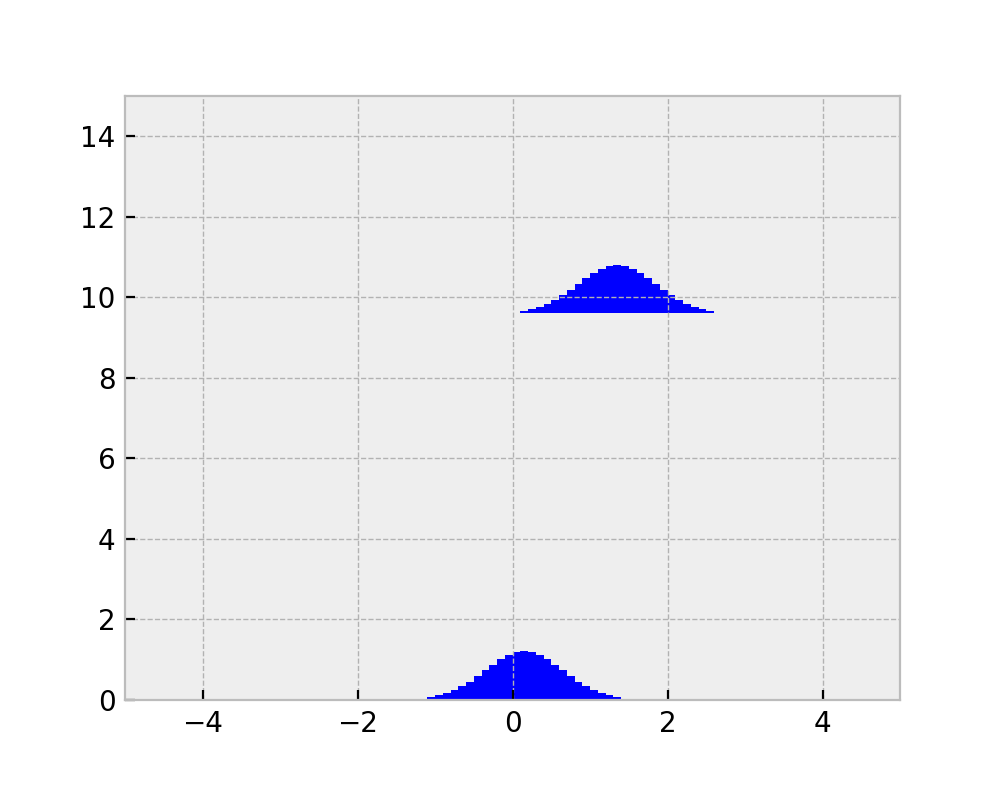

In [9]:
from matplotlib import animation
#This will do an animated histogram
%matplotlib notebook

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 4)

ax = plt.axes(xlim=(-5, 5), ylim=(0, 15))
blocks={}
floors={}
patchesPerBlock=25

def init():
    blocks['activeBlock']=0
    for num,var in enumerate(G25):
        center=round(var,1)
        blocks[num]=[]
        for i in range(patchesPerBlock):
            binedge=round(center+(i-patchesPerBlock//2)*0.1,1)
            patch = plt.Rectangle((binedge, 16), 0.1,
                                  stats.norm.pdf((i-patchesPerBlock//2)*0.1,scale=0.5)*1.5, fc='b')
            ax.add_patch(patch)
            blocks[num]+=[patch]
            floors[binedge]=0.01
        #print(num,var, patches)


    return []

def animatePatch(i, patch,update):
    return patch,

def animate(i, blocks):
    activeBlock=blocks['activeBlock']
    #print(activeBlock,blocks)
    numFloored=0
    for patch in blocks[activeBlock]:
        x,y=patch.xy
        if y<=floors[x]:
            #floors[x]=floors[x]+0.6
            #print("floors[",x,"]=",floors[x])
            patch.xy=(x,floors[x])
            numFloored+=1
        else:
            patch.xy=(x,y-0.2)
    if numFloored>=patchesPerBlock:
        for patch in blocks[activeBlock]:
            x,y=patch.xy
            floors[x]=round(floors[x]+patch.get_height(),1)
        blocks['activeBlock']=activeBlock+1
        activeBlock+=1
        if activeBlock not in blocks.keys():
            return []
        #print(patches[activePatch])
    for i in blocks:
        #print(patchnum)
        if i!='activeBlock':
            for patch in blocks[i]:
                animatePatch(i, patch,activeBlock==i)

    return[]

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=100*len(G25), 
                               fargs=(blocks,),
                               interval=5,
                               blit=True,repeat=False)
anim
plt.show()

Here is the same type of graph created with a wider, more finely quantized Gaussian shape and 100 Gaussian random variables:

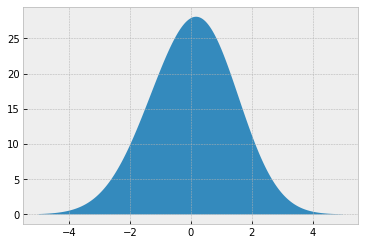

In [10]:
%matplotlib inline
x = np.linspace(-5,5, 1000)
density=np.zeros(x.size)
for xi in Gvals:
    ## Create new Gaussian RVs centered on the observation
    Gi=stats.norm(xi) 
    ## Use the density of the RV as the shape:
    density+=Gi.pdf(x) 
    
plt.fill_between(x, density);

**Magic!** This looks a lot like our density, even though we only had 100 observations!

The shape we use to build this new density estimate is called a **"kernel"**.

This approach is called **kernel density estimation (KDE)**.



* The free parameter of kernel density estimation is the **kernel** function, which specifies the shape of the distribution placed at each point, and the kernel **bandwidth**, which controls the size of the kernel at each point. In practice, there are many kernels you might use for a kernel density estimation: in particular, the Scikit-Learn KDE implementation supports six kernel functions, which you can read about in Scikit-Learn's [Density Estimation documentation](https://scikit-learn.org/stable/modules/density.html).

## Applying KDE to a dataset

In [11]:
df = pd.read_csv('firearms-urban.csv')

df

,STATE,RATE-2014,Percent Urban
0,AL,16.9,59.0
1,AK,19.2,66.0
2,AZ,13.5,89.8
3,AR,16.6,56.2
4,CA,7.4,95.0
5,CO,12.2,86.2
6,CT,5.0,88.0
7,DE,11.1,83.3
8,FL,11.5,91.2
9,GA,13.7,75.1


In [ ]:
N=50


#COMPLETE IN CLASS

plt.legend()
plt.title(str(N)+' Random Samples \nGenerated from the Gaussian KDE PDF');

___

# Statistical Inference

We have developed the Bayesian approach to inference, where unknown parameters are modeled as random variables. In all cases we worked within a single, fully-specified probabilistic model, and we based most of our derivations and calculation on judicious application of Bayes's rule.

By contrast, we can adopt a fundamentally different philosophy: we can view the unknown probabilistic parameter $\theta$ of the probability function as a *deterministic* quantity (not random) but, nevertheless, unknown quantity.

* The observational data $X=\{x_i\}_{i=1}^N$ is random and its distribution $p_X(x;\theta)$ (if $X$ is discrete) or $f_X(x;\theta)$ (if $X$ is continuous) depends on the value of $\theta$ (the parameters of the distribution). 

* Thus, instead of working with a single probabilistic model, we will be dealing simultaneously with *multiple candidate (probabilistic) models*, one model for each possible value of $\theta$.

* In this context, a *good* hypothesis testing or estimation procedure will be one that possesses certain desirable properties *under every candidate model*.

## Classical Parameter Estimation

Given observations $X=\{x_1,x_2,\dots,x_N\}$, an **estimator** is a random variable of the form $\hat{\theta} = g(X)$, for some function $g$. Note that since the distribution of $X$ depends on $\theta$, the same is true for the distribution of $\hat{\theta}$.

### Some Terminology

Let $\hat{\theta}$ be an **estimator** of an unknown parameter $\theta$, that is, a function of $N$ observations $X=\{x_i\}_{i=1}^N$ whose distribution depends on $\theta$.

<div class="alert alert-info">
    <b>Error of Estimator</b>

The **estimated error** is denoted by $\epsilon_{\theta}(\hat{\theta})$, is defined as
    
\begin{align*}
\epsilon_{\theta} = \hat{\theta} - \theta
\end{align*}
</div>

<div class="alert alert-info">
    <b>Bias of Estimator</b>

The **bias** of an estimator, denoted by $b_{\theta}(\hat{\theta})$ is defined as
    
\begin{align*}
b_{\theta}(\hat{\theta}) = E[\hat{\theta}] - \theta
\end{align*}
</div>

<div class="alert alert-info">
    <b>Variance of Estimator</b>

The **variance** of an estimator, denoted by $\operatorname{Var}_{\theta}[\hat{\theta}]$ is defined as
    
\begin{align*}
\operatorname{Var}_{\theta}[\hat{\theta}] = E\left[\left(\hat{\theta} -E[\hat{\theta}]\right)^2\right]
\end{align*}
</div>

<div class="alert alert-info">
    <b>Mean-Square Error of Estimator</b>

The **Mean-Square Error** of an estimator, denoted by $E\left[(\hat{\theta}-\theta)^2\right]$ is defined as
    
\begin{align*}
E\left[(\hat{\theta}-\theta)^2\right] = b^2_{\theta}\left[\hat{\theta}\right] + \operatorname{Var}_{\theta}[\hat{\theta}]
\end{align*}
</div>

The expected value, the variance, and the bias of $\hat{\theta}$ depend on $\theta$, while the estimation error depends in addition on the observations $x_1,\cdots, x_N$.

<div class="alert alert-info">
    <b>Unbiased Estimator</b>

We call $\hat{\theta}$ **unbiased** if $E[\hat{\theta}] = \theta$, for every possible value of $\theta$.
</div>

<div class="alert alert-info">
    <b>Asymptotically Unbiased Estimator</b>

We call $\hat{\theta}$ **asymptotically unbiased** if $\lim_{N\rightarrow\infty} E[\hat{\theta}] = \theta$, for every possible value of $\theta$.
</div>

### The Bias-Variance Trade-Off

Besides the bias $b_{\theta}(\hat{\theta})$, we are usually interested in the size of the estimation error. This is captured by the **mean squared error**, $E\left[(\hat{\theta}-\theta)^2\right]$, which is related to the bias and the variance of $\hat{\theta}$ according to the following formula:

\begin{align*}
E\left[(\hat{\theta}-\theta)^2\right] = b^2_{\theta}\left[\hat{\theta}\right] + \operatorname{Var}_{\theta}[\hat{\theta}]
\end{align*}

This formula is important because in many statistical problems there is a **trade-off** between the two terms on the right-hand-side. Often a reduction in the variance is accompanied by an increase in the bias. Of course, a good estimator
is one that manages to keep both terms small. This is also known as **The Bias-Variance Trade-off**.

___